In [80]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from nexusformat.nexus import *
from textwrap import wrap

params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)
mpl.rcParams['axes.linewidth'] = 3.0

In [64]:
AthEM=nxload('C:/Users/u5522838/Documents/Collaboration Docs/AthEM Nexus Files/fig6+7+8/fig6+7+8/athem_au.nxs')
BTE = nxload('C:/Users/u5522838/Documents/Collaboration Docs/AthEM Nexus Files/fig6+7+8/fig6+7+8/Boltzmann_au.nxs')

In [3]:
BTE_time = BTE.dynamics.time.time_discretization.nxvalue
AthEM_time = AthEM.dynamics.time.time_discretization.nxvalue
BTE_timeindex = min(range(len(BTE_time)), key=lambda i: abs(BTE_time[i]+0.0e-15))
AthEM_timeindex = min(range(len(AthEM_time)), key=lambda i: abs(AthEM_time[i]+0.0e-15))
print(BTE_timeindex)
print(AthEM_timeindex)

1074
750


In [4]:
BTE_FE = BTE.materials.material_0.electrons.band_0.total.offset_energy_static.nxvalue
AthEM_FE = AthEM.materials.material_0.electrons.band_1.total.offset_energy_static.nxvalue

In [5]:
BTE_data=BTE.dynamics.material_0.position_0_0_0.electrons.band_0.total.distribution.distribution.nxvalue
AthEM_eqdata=AthEM.dynamics.material_0.position_0_0_0.electrons.band_0.total.distribution.distribution.nxvalue
AthEM_neqdata=AthEM.dynamics.material_0.position_0_0_0.electrons.band_1.total.distribution.distribution.nxvalue
AthEM_data=AthEM.postprocessing.total_distribution.distribution.nxvalue

Electron-Electron Scattering distribution 

In [6]:
BTE_energy = BTE.dynamics.material_0.position_0_0_0.electrons.band_0.total.distribution.energy.nxvalue+BTE_FE
BTE_dis0fs=BTE_data[BTE_timeindex,:]


AthEM_energy = AthEM.dynamics.material_0.position_0_0_0.electrons.band_0.total.distribution.energy.nxvalue+AthEM_FE
AthEM_dis = AthEM_data[AthEM_timeindex,:]

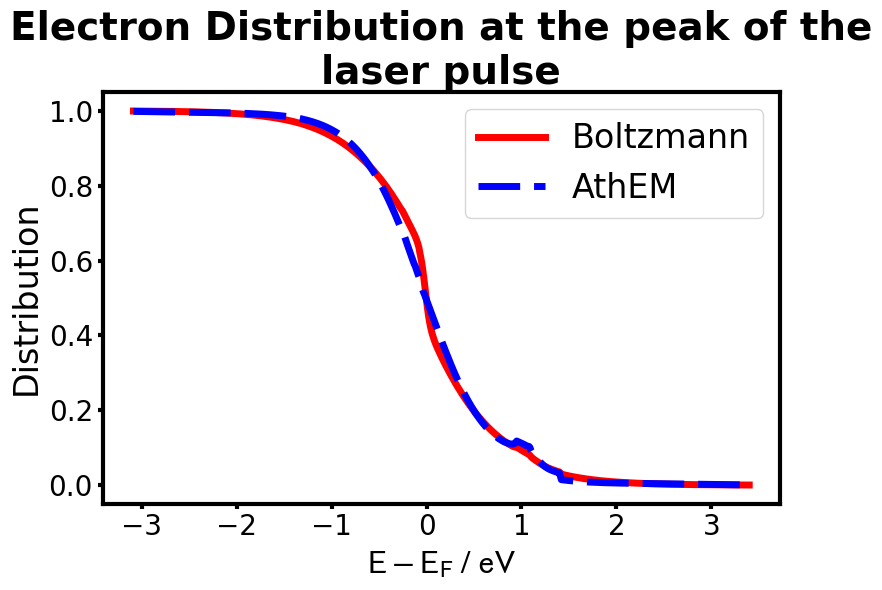

In [82]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(BTE_energy[200:-100],BTE_dis0fs[200:-100],label='Boltzmann',linewidth=5,color='red')
ax.plot(AthEM_energy[200:-100],AthEM_dis[200:-100],label='AthEM',linewidth=5,color='blue',dashes=[6,2])
ax.set_xlabel(r'$\mathrm{E-E_F \ / \ eV}$',fontsize=24)
ax.set_ylabel('Distribution',fontsize=24)
ax.set_title("\n".join(wrap('Electron Distribution at the peak of the laser pulse',40)),fontsize=28,fontweight='bold')
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.tight_layout()
plt.savefig('eescatter_dis.svg',dpi=2000)
plt.show()

Non-Eq electron distribution

In [8]:
def FermiDirac(egrid,cp,T):
    k = 8.617e-5
    return 1/(np.exp((egrid-cp)/(k*T))+1)

In [66]:
BTE_cp = BTE.dynamics.material_0.position_0_0_0.electrons.band_0.total.abs_chemical_potential.abs_chemical_potential.nxvalue[BTE_timeindex]
BTE_T = BTE.dynamics.material_0.position_0_0_0.electrons.band_0.total.temperature.temperature.nxvalue[BTE_timeindex]
BTE_neqdis=BTE_data[BTE_timeindex,:] - FermiDirac(BTE_energy,BTE_cp,BTE_T)

AthEM_cp = AthEM.postprocessing.abs_chemical_potential.abs_chemical_potential.nxvalue[AthEM_timeindex]
AthEM_T = AthEM.postprocessing.temperature.temperature.nxvalue[AthEM_timeindex]
AthEM_neqdis=AthEM_data[AthEM_timeindex,:] - FermiDirac(AthEM_energy,AthEM_cp,AthEM_T)

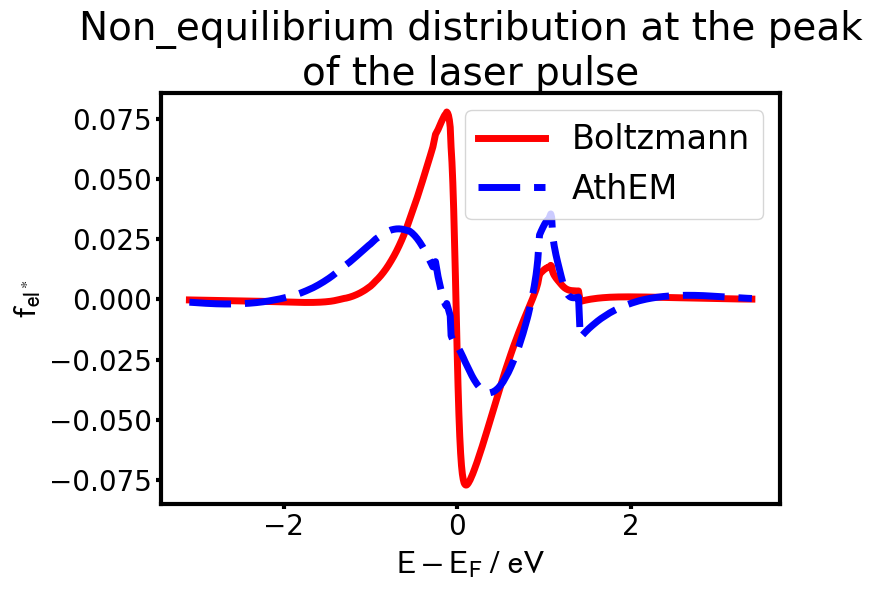

In [87]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(BTE_energy[200:-100],BTE_neqdis[200:-100],label='Boltzmann',linewidth=5,color='red')
ax.plot(AthEM_energy[200:-100],AthEM_neqdis[200:-100],label='AthEM',linewidth=5,color='blue',dashes=[6,2])
ax.set_xlabel(r'$\mathrm{E-E_F \ / \ eV}$',fontsize=24)
ax.set_ylabel(r'$\mathrm{f_{el^*}}$',fontsize=24)
ax.set_title("\n".join(wrap('Non_equilibrium distribution at the peak of the laser pulse',40)),fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.tight_layout()
plt.savefig('neqeescatter_dis.pdf',dpi=2000)
plt.show()

In [68]:
AthEM_DOS = AthEM.materials.material_0.electrons.band_0.total.DOS.dos.nxvalue
BTE_DOS = BTE.materials.material_0.electrons.band_0.total.DOS.dos.nxvalue

AthEM_cp = AthEM.postprocessing.abs_chemical_potential.abs_chemical_potential.nxvalue[AthEM_timeindex]
AthEM_T = AthEM.postprocessing.temperature.temperature.nxvalue[AthEM_timeindex]
AthEM_ehpdis=AthEM_data[AthEM_timeindex,:] - FermiDirac(AthEM_energy,AthEM_cp,AthEM_T)

AthEM_ehp = AthEM_DOS*AthEM_ehpdis
BTE_ehp = BTE_DOS*BTE_neqdis

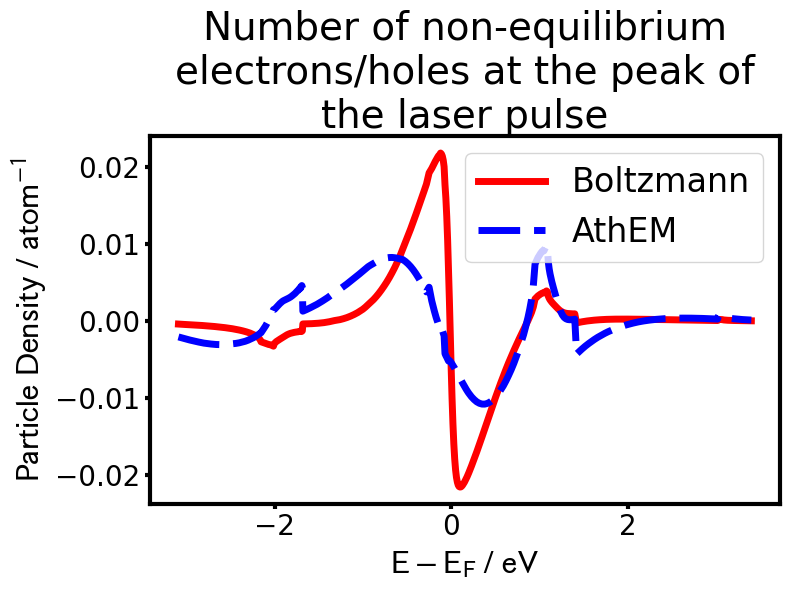

In [97]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(BTE_energy[200:-100],BTE_ehp[200:-100],label='Boltzmann',linewidth=5,color='red')
ax.plot(AthEM_energy[200:-100],AthEM_ehp[200:-100],label='AthEM',linewidth=5,color='blue',dashes=[6,2])
ax.set_xlabel(r'$\mathrm{E-E_F \ / \ eV}$',fontsize=24)
ax.set_ylabel(r'$\mathrm{Particle \ Density \ / \ atom^{-1}}$',fontsize=24)
ax.set_title("\n".join(wrap('Number of non-equilibrium electrons/holes at the peak of the laser pulse',30)),fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.tight_layout()
plt.savefig('ehp_dis.pdf',dpi=2000)
plt.show()

In [13]:
AthEM_eph=nxload('C:/Users/u5522838/Documents/Collaboration Docs/AthEM Nexus Files/fig11/fig11/athem.nxs')
BTE_eph = nxload('C:/Users/u5522838/Documents/Collaboration Docs/AthEM Nexus Files/fig11/fig11/Boltzmann_new.nxs')

In [14]:
BTE_eph_time = BTE_eph.dynamics.time.time_discretization.nxvalue*1e15
AthEM_eph_time = AthEM_eph.dynamics.time.time_discretization.nxvalue*1e15

BTE_eph_temp = BTE_eph.dynamics.material_0.position_0_0_0.electrons.band_0.total.temperature.temperature.nxvalue
AthEM_eph_temp = AthEM_eph.dynamics.material_0.position_0_0_0.electrons.band_0.total.temperature.temperature.nxvalue

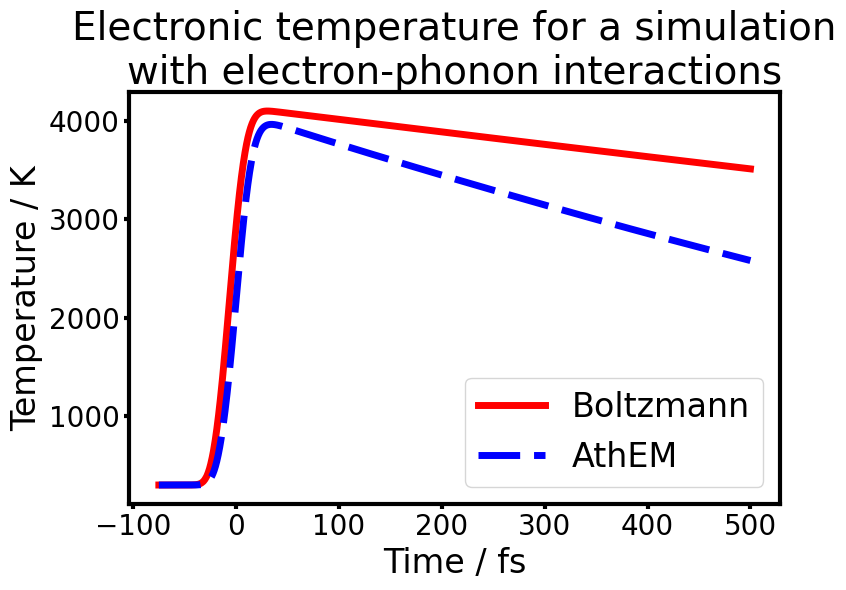

In [85]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(BTE_eph_time,BTE_eph_temp,label='Boltzmann',linewidth=5,color='red')
ax.plot(AthEM_eph_time,AthEM_eph_temp,label='AthEM',linewidth=5,color='blue',dashes=[6,2])
ax.set_xlabel('Time / fs',fontsize=24)
ax.set_ylabel('Temperature / K',fontsize=24)
ax.set_title("\n".join(wrap('Electronic temperature for a simulation with electron-phonon interactions',40)),fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.tight_layout()
plt.savefig('temps.pdf',dpi=2000)
plt.show()

In [27]:
l=np.loadtxt(open("../../SurfaceDOS.csv","rb"),delimiter=" ")


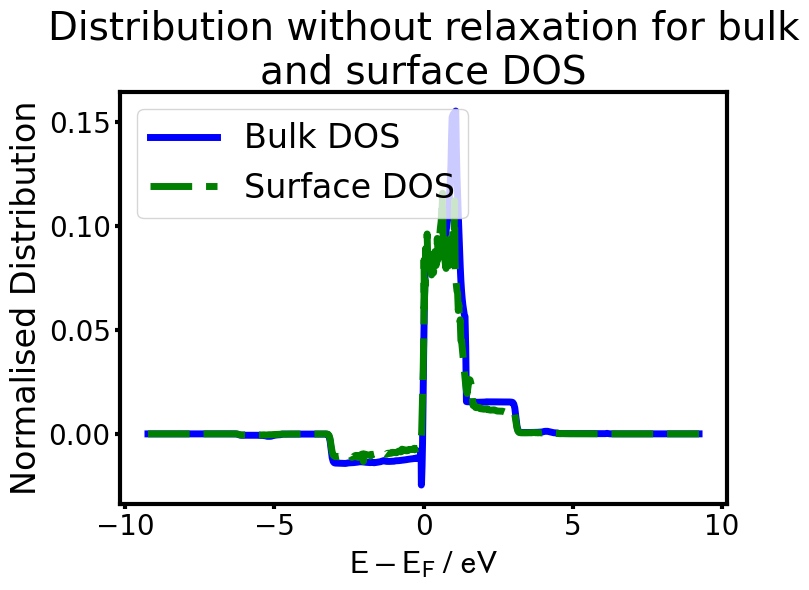

In [89]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(l[:,0],l[:,1],label='Bulk DOS',linewidth=5,color='blue')
ax.plot(l[:,0],l[:,2],label='Surface DOS',linewidth=5,color='green',dashes=[6,2])
ax.set_xlabel(r'$\mathrm{E-E_F \ / \ eV}$',fontsize=24)
ax.set_ylabel('Normalised Distribution',fontsize=24)
ax.set_title("\n".join(wrap('Distribution without relaxation for bulk and surface DOS',40)),fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24},loc='upper left')
plt.tight_layout()
plt.savefig('SurfaceDOS.pdf',dpi=2000)
plt.show()

In [45]:
cus = nxload('C:/Users/u5522838/Documents/Collaboration Docs/AthEM Nexus Files/CustomDOS.nxs')
cus_time=cus.dynamics.time.time_discretization.nxvalue
cus_timeindex = min(range(len(AthEM_time)), key=lambda i: abs(cus_time[i]+0.0e-15))
cus_FE = cus.materials.material_0.electrons.band_0.total.offset_energy_static.nxvalue
cus_eq=cus.dynamics.material_0.position_0_0_0.electrons.band_0.total.distribution.distribution.nxvalue
cus_neq=cus.dynamics.material_0.position_0_0_0.electrons.band_1.total.distribution.distribution.nxvalue
cus_DOS=cus.materials.material_0.electrons.band_0.total.DOS.dos.nxvalue
cus_energy = cus.dynamics.material_0.position_0_0_0.electrons.band_0.total.distribution.energy.nxvalue+cus_FE

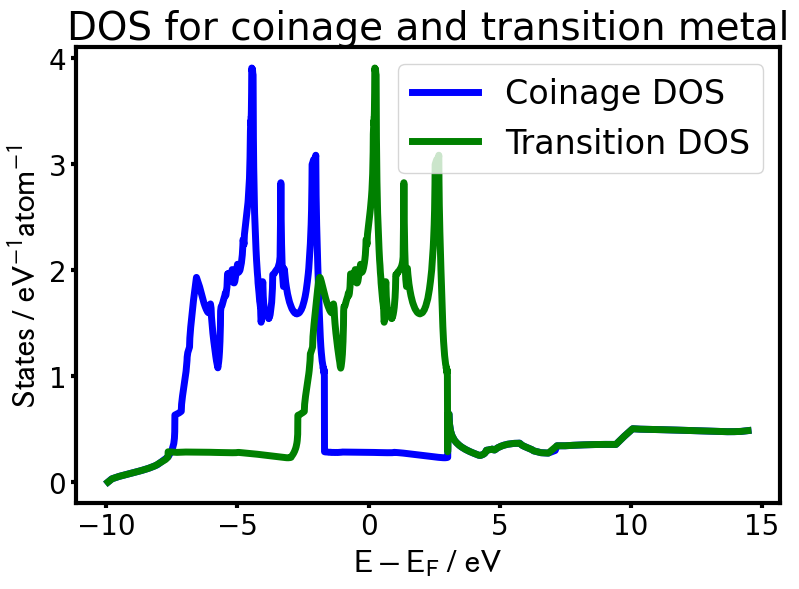

In [91]:
fig,ax=plt.subplots(tight_layout=True)
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(AthEM_energy,AthEM_DOS,label='Coinage DOS',linewidth=5,color='blue')
ax.plot(cus_energy,cus_DOS,label='Transition DOS',linewidth=5,color='green')
ax.set_xlabel(r'$\mathrm{E-E_F \ / \ eV}$',fontsize=24)
ax.set_ylabel(r'$\mathrm{States \ / \ eV^{-1}atom^{-1}}$',fontsize=24)
ax.set_title("\n".join(wrap('DOS for coinage and transition metal',40)),fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.savefig('CustomDOS.pdf',dpi=2000)
plt.show()

In [94]:
cus_cp = cus.dynamics.material_0.position_0_0_0.electrons.band_0.total.abs_chemical_potential.abs_chemical_potential.nxvalue[cus_timeindex]
cus_T = cus.postprocessing.temperature.temperature.nxvalue[cus_timeindex]
cus_ehpdis=cus_neq[cus_timeindex,:]+cus_eq[cus_timeindex,:] - FermiDirac(cus_energy,cus_cp,cus_T)
cus_ehp = cus_ehpdis*cus_DOS

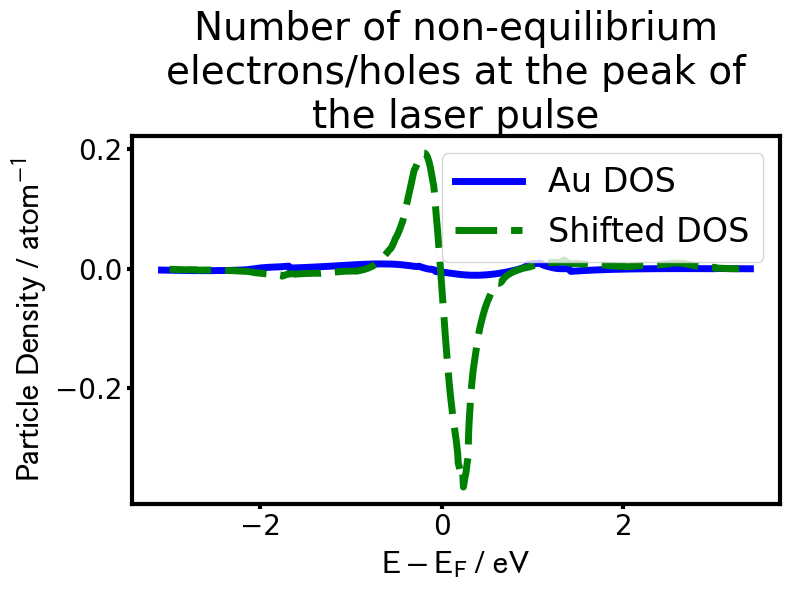

In [96]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(AthEM_energy[200:-100],AthEM_ehp[200:-100],label='Au DOS',linewidth=5,color='blue')
ax.plot(cus_energy[90:-100],cus_ehp[90:-100],label='Shifted DOS',linewidth=5,color='green',dashes=[6,2])
ax.set_xlabel(r'$\mathrm{E-E_F \ / \ eV}$',fontsize=24)
ax.set_ylabel(r'$\mathrm{Particle \ Density \ / \ atom^{-1}}$',fontsize=24)
ax.set_title("\n".join(wrap('Number of non-equilibrium electrons/holes at the peak of the laser pulse',30)),fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.tight_layout()
plt.savefig('customehp_dis.pdf',dpi=2000)
plt.show()

In [58]:
AthEM_Temps = AthEM.dynamics.material_0.position_0_0_0.electrons.band_0.total.temperature.temperature.nxvalue
cus_Temps = cus.dynamics.material_0.position_0_0_0.electrons.band_0.total.temperature.temperature.nxvalue

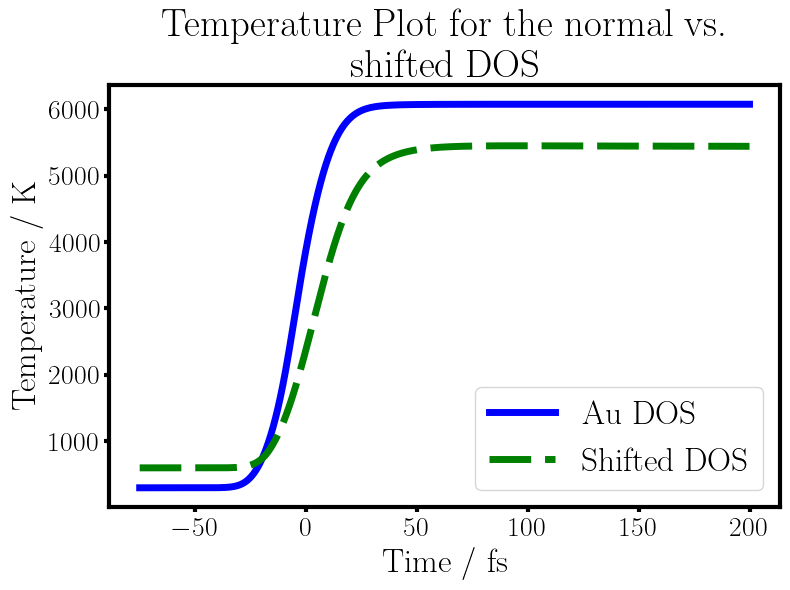

In [71]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.plot(AthEM_time*1e15,AthEM_Temps,label='Au DOS',linewidth=5,color='blue')
ax.plot(cus_time*1e15,cus_Temps*2,label='Shifted DOS',linewidth=5,color='green',dashes=[6,2])
ax.set_xlabel('Time / fs',fontsize=24)
ax.set_ylabel('Temperature / K',fontsize=24)
ax.set_title("\n".join(wrap('Temperature Plot for the normal vs. shifted DOS',40)),fontsize=28,fontweight='bold')
ax.tick_params(axis='both',which='major',labelsize=20,width=3)
ax.legend(prop={'size': 24})
plt.tight_layout()
#plt.savefig('customehp_dis.pdf',dpi=2000)
plt.show()